In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("lstm_ready_traffic_data.csv")
scaler = MinMaxScaler()
df['scaled_traffic_volume'] = scaler.fit_transform(df[['Total_Traffic_Volume']])
# If 'day_of_week' is text, convert to numeric
if df['day_of_week'].dtype == 'object':
    df['day_of_week'] = df['day_of_week'].astype('category').cat.codes

# Select features and target
features = ['hour', 'day_of_week', 'month', 'year', 'road_name_encoded',
            'location_encoded', 'suburb_encoded', 'average_speed',
            'maximum_speed', 'Speeding_Incident', 'Speeding_Incident_Avg_Speed']
target = 'scaled_traffic_volume'

# Convert features and target to float32 (required by LSTM)
X = df[features].values.astype('float32')
y = df[target].values.astype('float32')

# Create sequences
def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history_single = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test MSE:", loss)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 59098.9023 - val_loss: 123.5134
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 112.4241 - val_loss: 181.4071
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 78.0038 - val_loss: 67.7007
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 22.3738 - val_loss: 13.8118
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 3.9850 - val_loss: 1.6456
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.3857 - val_loss: 0.2095
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.0343 - val_loss: 0.1282
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0233 - val_loss: 0.1072
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0191 - val_loss: 0.0863
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 0.0146 - val_loss: 0.0653
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 0.0140 - val_loss: 0.0400
Epoch 12/20
789/

In [ ]:
from tensorflow.keras.layers import Dropout
model_multi = Sequential()
model_multi.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_multi.add(Dropout(0.2))
model_multi.add(LSTM(32, activation='relu'))
model_multi.add(Dropout(0.2))
model_multi.add(Dense(1))
model_multi.compile(optimizer='adam', loss='mse')
model_multi.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - loss: 342830.9688 - val_loss: 172.5361
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - loss: 821.2417 - val_loss: 30.5758
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 229.4341 - val_loss: 9.5408
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 97.8524 - val_loss: 28.7287
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - loss: 69.1041 - val_loss: 0.4408
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 29.3137 - val_loss: 1.9467
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - loss: 39.9170 - val_loss: 0.0148
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 5.2057 - val_loss: 0.5088
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 4.3947 - val_loss: 0.2882
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 5.2071 - val_loss: 0.0105
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 2.3800 - val_loss: 0.0101
Epoch 12/20
7

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict and compare both
y_pred_single = model.predict(X_test)
y_pred_multi = model_multi.predict(X_test)

# Metrics
def evaluate(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse= mean_squared_error(y_true, y_pred)
    print(f"\n🔍 {name} Model Evaluation:")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAE : {mae:.4f}")
    print(f"🔹 R²  : {r2:.4f}")
    print(f"🔹 MSE : {mse:.4f}")
evaluate("Single-Layer LSTM", y_test, y_pred_single)
evaluate("Two-Layer LSTM", y_test, y_pred_multi)


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

🔍 Single-Layer LSTM Model Evaluation:
🔹 RMSE: 0.0928
🔹 MAE : 0.0506
🔹 R²  : -0.1080
🔹 MSE : 0.0086

🔍 Two-Layer LSTM Model Evaluation:
🔹 RMSE: 0.0990
🔹 MAE : 0.0511
🔹 R²  : -0.2619
🔹 MSE : 0.0098


<ipython-input-4-df5a6f098765>:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


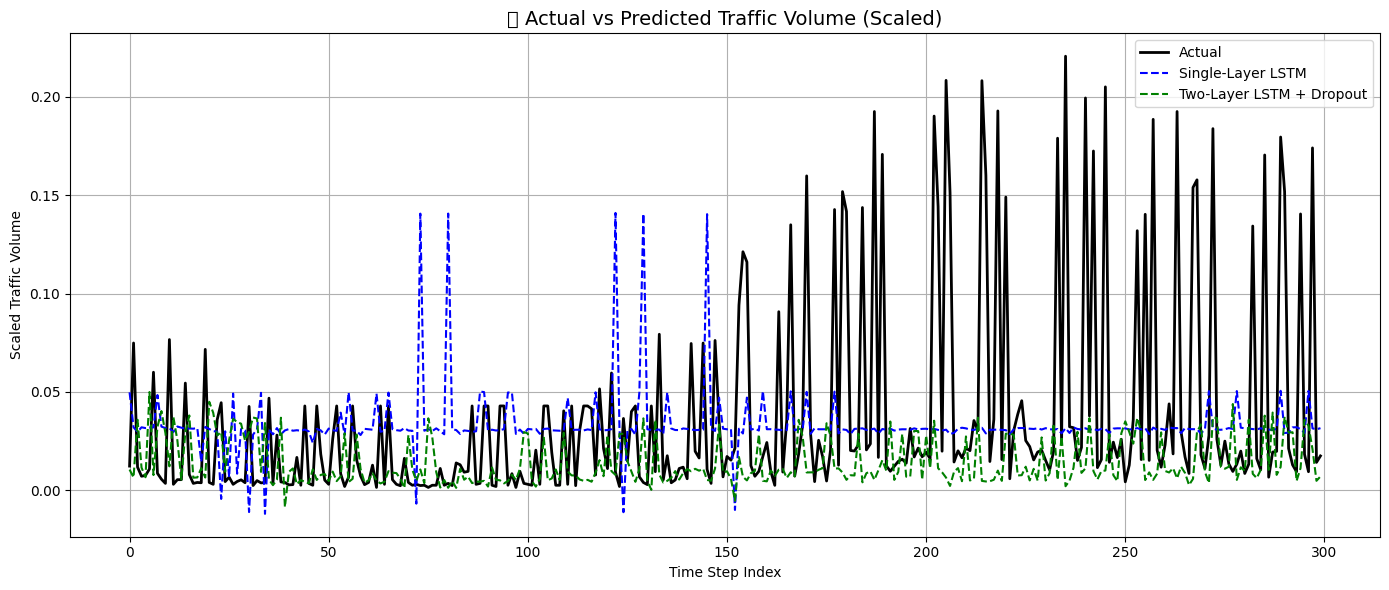

In [ ]:
import matplotlib.pyplot as plt

# Plot a subset for clarity (e.g., first 300 points)
plot_range = 300

plt.figure(figsize=(14, 6))

# Plot actual values
plt.plot(y_test[:plot_range], label='Actual', color='black', linewidth=2)

# Plot predictions from single-layer model
plt.plot(y_pred_single[:plot_range], label='Single-Layer LSTM', linestyle='--', color='blue')

# Plot predictions from two-layer model
plt.plot(y_pred_multi[:plot_range], label='Two-Layer LSTM + Dropout', linestyle='--', color='green')

plt.title('🔍 Actual vs Predicted Traffic Volume (Scaled)', fontsize=14)
plt.xlabel('Time Step Index')
plt.ylabel('Scaled Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    patience=3,              # Stop after 3 epochs without improvement
    restore_best_weights=True  # Revert to best weights
)
history_multi = model_multi.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,               # Max epochs (it may stop earlier)
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 2.7970 - val_loss: 0.0305
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - loss: 0.0261 - val_loss: 0.0081
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - loss: 0.1127 - val_loss: 0.0085
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - loss: 0.1239 - val_loss: 0.0111
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 0.0791 - val_loss: 0.1173


In [ ]:
# Predict
y_pred_multi = model_multi.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mae = mean_absolute_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)

# Results
print("\n✅ Two-Layer LSTM + Dropout (with EarlyStopping):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

✅ Two-Layer LSTM + Dropout (with EarlyStopping):
🔹 RMSE: 0.0899
🔹 MAE : 0.0590
🔹 R²  : -0.0402
🔹 MSE : 0.0081


In [ ]:
trimodel = Sequential()
# Layer 1 - returns sequences for next layer
trimodel.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
trimodel.add(Dropout(0.2))  # Dropout after first LSTM

# Layer 2 - returns sequences again
trimodel.add(LSTM(32, activation='relu', return_sequences=True))
trimodel.add(Dropout(0.2))  # Dropout after second LSTM

# Layer 3 - last LSTM layer, does not return sequences
trimodel.add(LSTM(16, activation='relu'))
trimodel.add(Dropout(0.2))  # Final Dropout

# Output layer
trimodel.add(Dense(1))

# Compile the model
trimodel.compile(optimizer='adam', loss='mse')
trimodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - loss: 131156.7344 - val_loss: 234.5931
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - loss: 1322.2289 - val_loss: 0.2052
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 248.0952 - val_loss: 1.9698
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 121.7749 - val_loss: 0.6849
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - loss: 100.6740 - val_loss: 0.2229
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 28.2378 - val_loss: 0.0544
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 17.6585 - val_loss: 0.0309
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 14.7264 - val_loss: 2.4345
Epoch 9/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - loss: 12.4072 - val_loss: 1.5083
Epoch 10/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - loss: 5.0615 - val_loss: 0.0112
Epoch 11/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - loss: 7.4977 - val_loss: 1.2331
Epoch 12/2

In [ ]:
history_tri = trimodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,               # Max epochs (it may stop earlier)
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - loss: 0.4157 - val_loss: 0.0147
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - loss: 0.5964 - val_loss: 0.0089
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - loss: 0.0555 - val_loss: 0.0113
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - loss: 0.1464 - val_loss: 0.0097
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 0.0630 - val_loss: 3.3431


In [ ]:
# Predict
y_pred_tri = trimodel.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tri))
mae = mean_absolute_error(y_test, y_pred_tri)
r2 = r2_score(y_test, y_pred_tri)
mse = mean_squared_error(y_test, y_pred_tri)

# Results
print("\n✅ Three-Layer LSTM + Dropout (with EarlyStopping):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step

✅ Three-Layer LSTM + Dropout (with EarlyStopping):
🔹 RMSE: 0.0942
🔹 MAE : 0.0656
🔹 R²  : -0.1431
🔹 MSE : 0.0089


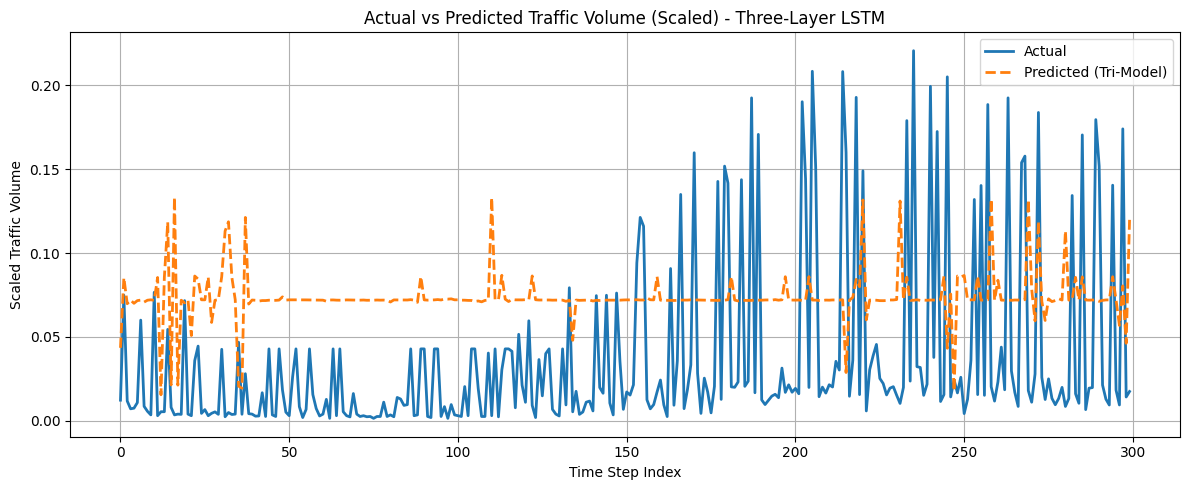

In [ ]:


plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred_tri[:300], label='Predicted (Tri-Model)', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Traffic Volume (Scaled) - Three-Layer LSTM')
plt.xlabel('Time Step Index')
plt.ylabel('Scaled Traffic Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-11-cd2fa1e00248>:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


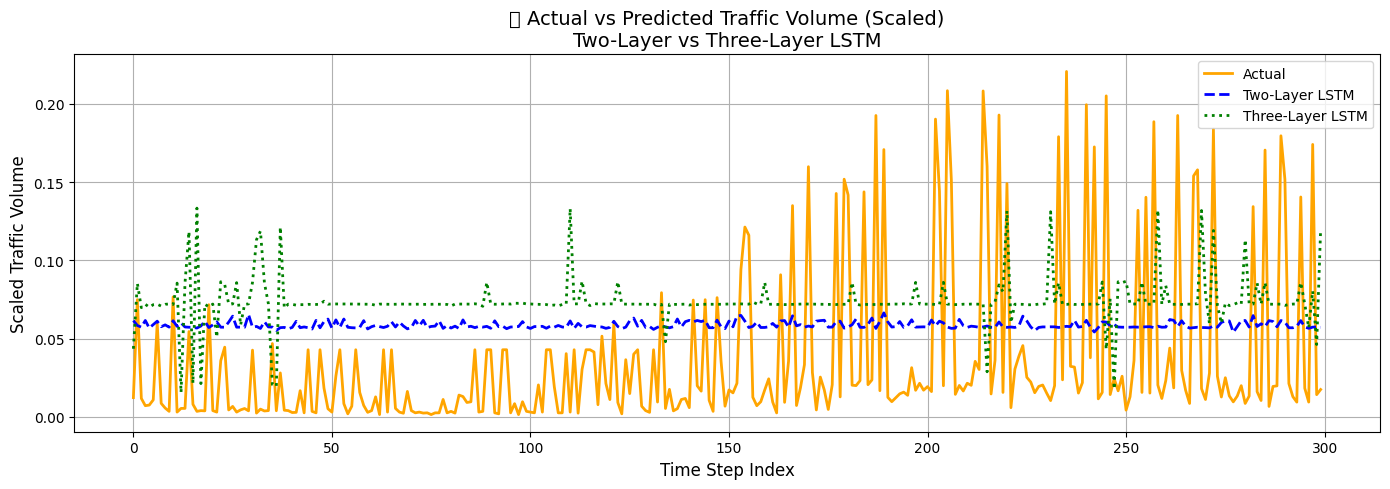

In [ ]:

# ✅ Replace these with your actual prediction arrays
# Make sure y_test, y_pred_multi, and y_pred_tri are defined and same length
# Example only:
# y_test = actual traffic values (scaled)
# y_pred_multi = predictions from 2-layer LSTM
# y_pred_tri = predictions from 3-layer LSTM

# Plot first 300 values for clarity
plt.figure(figsize=(14, 5))
plt.plot(y_test[:300], label='Actual', color='orange', linewidth=2)
plt.plot(y_pred_multi[:300], label='Two-Layer LSTM', linestyle='--', color='blue', linewidth=2)
plt.plot(y_pred_tri[:300], label='Three-Layer LSTM', linestyle=':', color='green', linewidth=2)

plt.title("📉 Actual vs Predicted Traffic Volume (Scaled)\nTwo-Layer vs Three-Layer LSTM", fontsize=14)
plt.xlabel("Time Step Index", fontsize=12)
plt.ylabel("Scaled Traffic Volume", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
trimodel1 = Sequential()
# Layer 1 - returns sequences for next layer
trimodel1.add(LSTM(64, activation='selu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
trimodel1.add(Dropout(0.2))  # Dropout after first LSTM

# Layer 2 - returns sequences again
trimodel1.add(LSTM(32, activation='selu', return_sequences=True))
trimodel1.add(Dropout(0.2))  # Dropout after second LSTM

# Layer 3 - last LSTM layer, does not return sequences
trimodel1.add(LSTM(16, activation='selu'))
trimodel1.add(Dropout(0.2))  # Final Dropout

# Output layer
trimodel1.add(Dense(1))

# Compile the model
trimodel1.compile(optimizer='adam', loss='mse')
trimodel1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - loss: 1264967.0000 - val_loss: 462.1820
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - loss: 4677.6328 - val_loss: 3682.0630
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - loss: 3038.2429 - val_loss: 2129.6321
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 1377.4231 - val_loss: 1332.0807


In [ ]:
# Predict on the test set
y_pred_trimodel1 = trimodel1.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_trimodel1))
mae = mean_absolute_error(y_test, y_pred_trimodel1)
r2 = r2_score(y_test, y_pred_trimodel1)
mse = mean_squared_error(y_test, y_pred_trimodel1)

# Print results
print("\n✅ Evaluation Metrics for trimodel1 (LSTM + SELU):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step

✅ Evaluation Metrics for trimodel1 (LSTM + SELU):
🔹 RMSE: 21.4984
🔹 MAE : 16.8389
🔹 R²  : -59474.8984
🔹 MSE : 462.1816


In [ ]:
trimodel2 = Sequential()
# Layer 1 - returns sequences for next layer
trimodel2.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
trimodel2.add(Dropout(0.2))  # Dropout after first LSTM

# Layer 2 - returns sequences again
trimodel2.add(LSTM(32, activation='tanh', return_sequences=True))
trimodel2.add(Dropout(0.2))  # Dropout after second LSTM

# Layer 3 - last LSTM layer, does not return sequences
trimodel2.add(LSTM(16, activation='tanh'))
trimodel2.add(Dropout(0.2))  # Final Dropout

# Output layer
trimodel2.add(Dense(1))

# Compile the model
trimodel2.compile(optimizer='adam', loss='mse')
trimodel2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 2/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - loss: 0.0070 - val_loss: 0.0079
Epoch 3/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 4/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - loss: 0.0072 - val_loss: 0.0078
Epoch 5/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - loss: 0.0067 - val_loss: 0.0077
Epoch 6/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 7/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - loss: 0.0070 - val_loss: 0.0078
Epoch 8/20
789/789 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - loss: 0.0069 - val_loss: 0.0078


In [ ]:
# Predict on the test set
y_pred_trimodel2 = trimodel2.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_trimodel2))
mae = mean_absolute_error(y_test, y_pred_trimodel2)
r2 = r2_score(y_test, y_pred_trimodel2)
mse = mean_squared_error(y_test, y_pred_trimodel2)

# Print results
print("\n✅ Evaluation Metrics for trimodel2 (LSTM + tanh):")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE : {mae:.4f}")
print(f"🔹 R²  : {r2:.4f}")
print(f"🔹 MSE : {mse:.4f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step

✅ Evaluation Metrics for trimodel2 (LSTM + tanh):
🔹 RMSE: 0.0880
🔹 MAE : 0.0541
🔹 R²  : 0.0027
🔹 MSE : 0.0077


In [ ]:
from tensorflow.keras.layers import Bidirectional
# Define Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(32, activation='relu')))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(1))

# Compile
bilstm_model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
bilstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, callbacks=[early_stop], verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 187s 224ms/step - loss: 3579527.0000 - val_loss: 19678.6777
Epoch 2/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 173s 220ms/step - loss: 38033.0000 - val_loss: 20400.4395
Epoch 3/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 204s 222ms/step - loss: 12473.0303 - val_loss: 310.6872
Epoch 4/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 200s 220ms/step - loss: 1950.1372 - val_loss: 7.9439
Epoch 5/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 205s 223ms/step - loss: 436.7780 - val_loss: 0.8293
Epoch 6/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 193s 212ms/step - loss: 538.6873 - val_loss: 0.6892
Epoch 7/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 208s 220ms/step - loss: 195.7111 - val_loss: 0.7598
Epoch 8/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 205s 224ms/step - loss: 248.9651 - val_loss: 0.3477
Epoch 9/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 178s 226ms/step - loss: 92.4624 - val_loss: 1.2215
Epoch 10/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 201s 224ms/step - loss: 155.3672 - val_loss: 0.6173
Epoch 11/30
789/789 ━━━━━━━━━━━━━━━━━━━━ 191s 211ms/step - lo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_pred_bilstm = bilstm_model.predict(X_test)

# Metrics
rmse_bi = np.sqrt(mean_squared_error(y_test, y_pred_bilstm))
mae_bi = mean_absolute_error(y_test, y_pred_bilstm)
r2_bi = r2_score(y_test, y_pred_bilstm)
mse_bi = mean_squared_error(y_test, y_pred_bilstm)

# Results
print("\n✅ Bidirectional LSTM Model Results:")
print(f"🔹 RMSE: {rmse_bi:.4f}")
print(f"🔹 MAE : {mae_bi:.4f}")
print(f"🔹 R²  : {r2_bi:.4f}")
print(f"🔹 MSE : {mse_bi:.4f}")


395/395 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step

✅ Bidirectional LSTM Model Results:
🔹 RMSE: 0.1298
🔹 MAE : 0.0975
🔹 R²  : -1.1677
🔹 MSE : 0.0168


<ipython-input-18-43a12f52e9b0>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


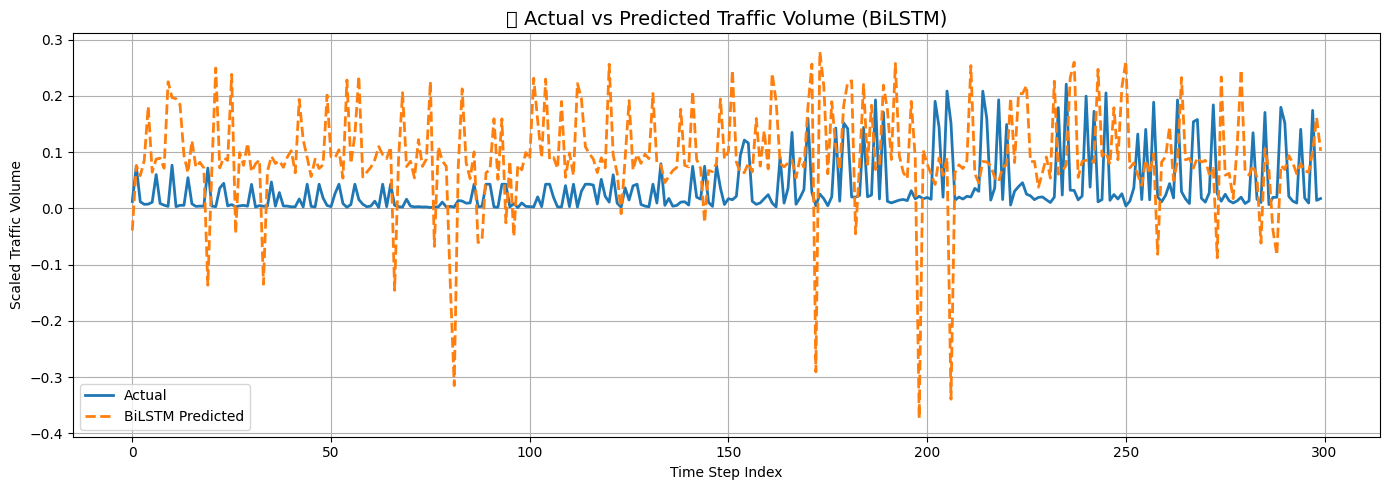

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred_bilstm[:300], label='BiLSTM Predicted', linestyle='--', linewidth=2)
plt.title("📊 Actual vs Predicted Traffic Volume (BiLSTM)", fontsize=14)
plt.xlabel("Time Step Index")
plt.ylabel("Scaled Traffic Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


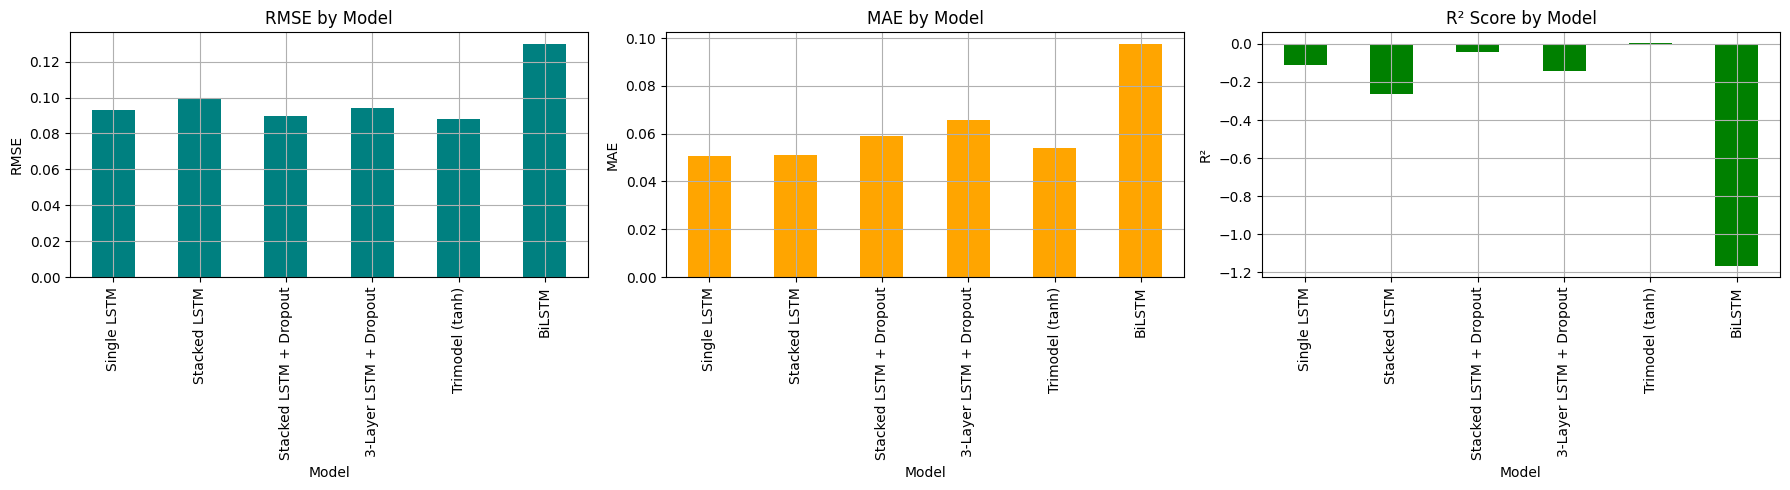

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Example metric results for all models (replace with your real values if needed)
model_metrics = [
    {"Model": "Single LSTM", "RMSE": 0.0928, "MAE": 0.0506, "R2": -0.1080, "MSE": 0.0086},
    {"Model": "Stacked LSTM", "RMSE": 0.0990, "MAE": 0.0511, "R2": -0.2619, "MSE": 0.0098},
    {"Model": "Stacked LSTM + Dropout", "RMSE": 0.0899, "MAE": 0.0590, "R2": -0.0402, "MSE": 0.0081},
    {"Model": "3-Layer LSTM + Dropout", "RMSE": 0.0942, "MAE": 0.0656, "R2": -0.1431, "MSE": 0.0089},
    {"Model": "Trimodel (tanh)", "RMSE": 0.0880, "MAE": 0.0541, "R2": 0.0027, "MSE": 0.0077},
    {"Model": "BiLSTM", "RMSE": 0.1298, "MAE": 0.0975, "R2": -1.1677, "MSE": 0.0168}
]

# Convert to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Plot RMSE, MAE, and R2 for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df_metrics.plot(kind='bar', x='Model', y='RMSE', ax=axes[0], legend=False, color='teal')
axes[0].set_title('RMSE by Model')
axes[0].set_ylabel('RMSE')
axes[0].grid(True)

df_metrics.plot(kind='bar', x='Model', y='MAE', ax=axes[1], legend=False, color='orange')
axes[1].set_title('MAE by Model')
axes[1].set_ylabel('MAE')
axes[1].grid(True)

df_metrics.plot(kind='bar', x='Model', y='R2', ax=axes[2], legend=False, color='green')
axes[2].set_title('R² Score by Model')
axes[2].set_ylabel('R²')
axes[2].grid(True)

plt.tight_layout()
plt.show()
